In [31]:
from helper_funcs import *
import os
# Replace this with the path to your otocoherence repo
os.chdir(r"C:\Users\setht\Dropbox\Citadel\GitHub\otocoherence")

In [32]:
%load_ext autoreload
%autoreload
import matplotlib.pyplot as plt
import phaseco as pc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
# Folders
paper_figures_folder = os.path.join('results', 'paper_figures')
pkl_folder = os.path.join('pickles', 'soae')
tau_pkl_folder = 'pickles'
os.makedirs(paper_figures_folder, exist_ok=True)


In [34]:
# Colors
anole_color = "#07586E"
human_color = "#8C60B3"

# Fontsize / labels
fontsize = 34
labelpad = 20

In [35]:
"PARAMETERS"
# WF pre-processing parameters
# filter_meth = {
#     "type": "kaiser",
#     "cf": 300,
#     "df": 50,
#     "rip": 100,
# }  # High pass filter cutoff freq, transition band width, and max allowed ripple (in dB)
filter_meth=None
wf_len_s = 60  # Will crop waveform to this length (in seconds)
scale = True  # Scale the waveform (only actually scales if we know the right scaling constant, which is only Anoles and Humans)

# Coherence Parameters
hop_s = 0.01
win_type = "flattop"
rho=1.0
win_meth = {"method": "rho", "rho": rho, "win_type":win_type}
pw = False
bw = 50
xi_min_s = 0.001
delta_xi_s = 0.001
nfft = 2**14
const_N_pd = 0


# Start building LCC kwargs dict with constants
lcc_kwargs ={
        'wf_len_s':wf_len_s,
        'filter_meth':filter_meth,        
        'pw':pw,
        'xi_min_s':xi_min_s,
        'win_meth':win_meth,
        "nfft": nfft,
        "pkl_folder": pkl_folder,
}






Processing 'pickles\soae\Human 1, PW=False, rho=1.0, Flattop, hop=441, tau=3285, filter=None, xi_max=1000ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=JIrearSOAEwf2 (Colossogram).pkl'


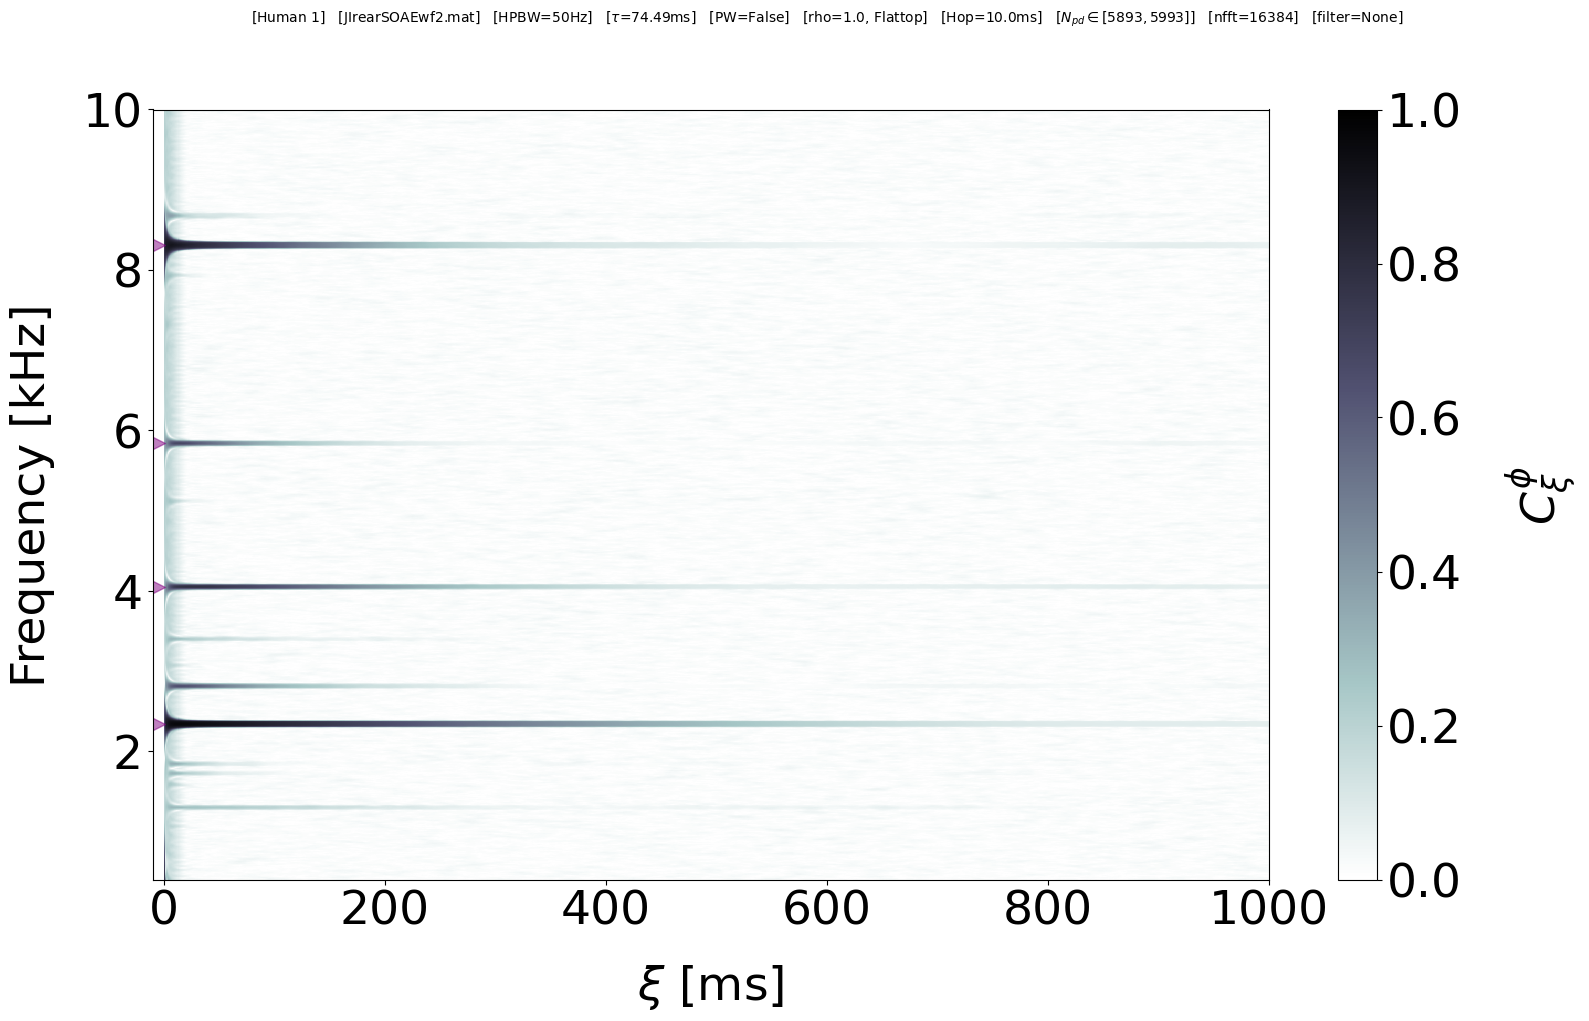

In [36]:
"Human Colossogram"

# Choose subject
species = "Human"
wf_idx = 1

# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 1.0
tau = get_precalc_tau_from_bw(bw, fs, win_type, tau_pkl_folder)

# Load Colossogram
cgram_dict = load_calc_colossogram(
    **(
        lcc_kwargs
        | {
            "xi_max_s": xi_max_s,
            "species": species,
            "fs": fs,
            "tau": tau,
            "hop": int(round(hop_s * fs)),
            "wf": wf,
            "wf_idx": wf_idx,
            "wf_fn": wf_fn,
        }
    )
)


# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
fn_id = cgram_dict["fn_id"]
win_meth_str = cgram_dict["win_meth_str"]
method_id = cgram_dict["method_id"]
filter_str = cgram_dict["filter_str"]
N_pd_str = pc.get_N_pd_str(const_N_pd, cgram_dict["N_pd_min"], cgram_dict["N_pd_max"])
f = cgram_dict["f"]
xis_s = cgram_dict["xis_s"]
good_peak_idxs = np.argmin(np.abs(f[:, None] - good_peak_freqs[None, :]), axis=0)
method_id = rf"[$\tau$={(tau/fs)*1000:.2f}ms]   [PW={pw}]   [{win_meth_str}]   [Hop={hop_s*1000:.1f}ms]   [{N_pd_str}]   [nfft={nfft}]"
suptitle = (
    rf"[{species} {wf_idx}]   [{wf_fn}]   [HPBW={bw}Hz]   {method_id}   [{filter_str}]"
)

# MAKE PLOT
plt.figure(figsize=(18, 10))
cbar = pc.plot_colossogram(cgram_dict, cmap="bone_r", return_cbar=True)
# Set Chris' requested fontsizes
ax = plt.gca()


ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel("Frequency [kHz]", labelpad=labelpad, fontsize=fontsize)

ax.tick_params("both", labelsize=fontsize)
cbar.ax.yaxis.label.set_fontsize(fontsize)
cbar.ax.tick_params(labelsize=fontsize)

xmin = -10
xmax = 1000
plt.ylim(0.4, 10)
plt.xlim(-10, xmax)

for f0_idx in good_peak_idxs:
    plt.scatter(
        xmin / 2,
        f[f0_idx] / 1000,
        c="purple",
        marker=">",
        label="Peak at " + f"{f[f0_idx]:0f}Hz",
        alpha=0.5,
        s=100
    )

# plt.title(f"Colossogram", fontsize=18)
plt.suptitle(suptitle, fontsize=10)
# plt.tight_layout()
plt.savefig(
    os.path.join(paper_figures_folder, f"Human Colossogram ({wf_fn.split('.')[0]}).jpg"),
    dpi=500,
)

Processing 'pickles\soae\Owl 3, PW=False, rho=1.0, Flattop, hop=441, tau=3285, filter=None, xi_max=100ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=owl_TAG4learSOAEwf1 (Colossogram).pkl'


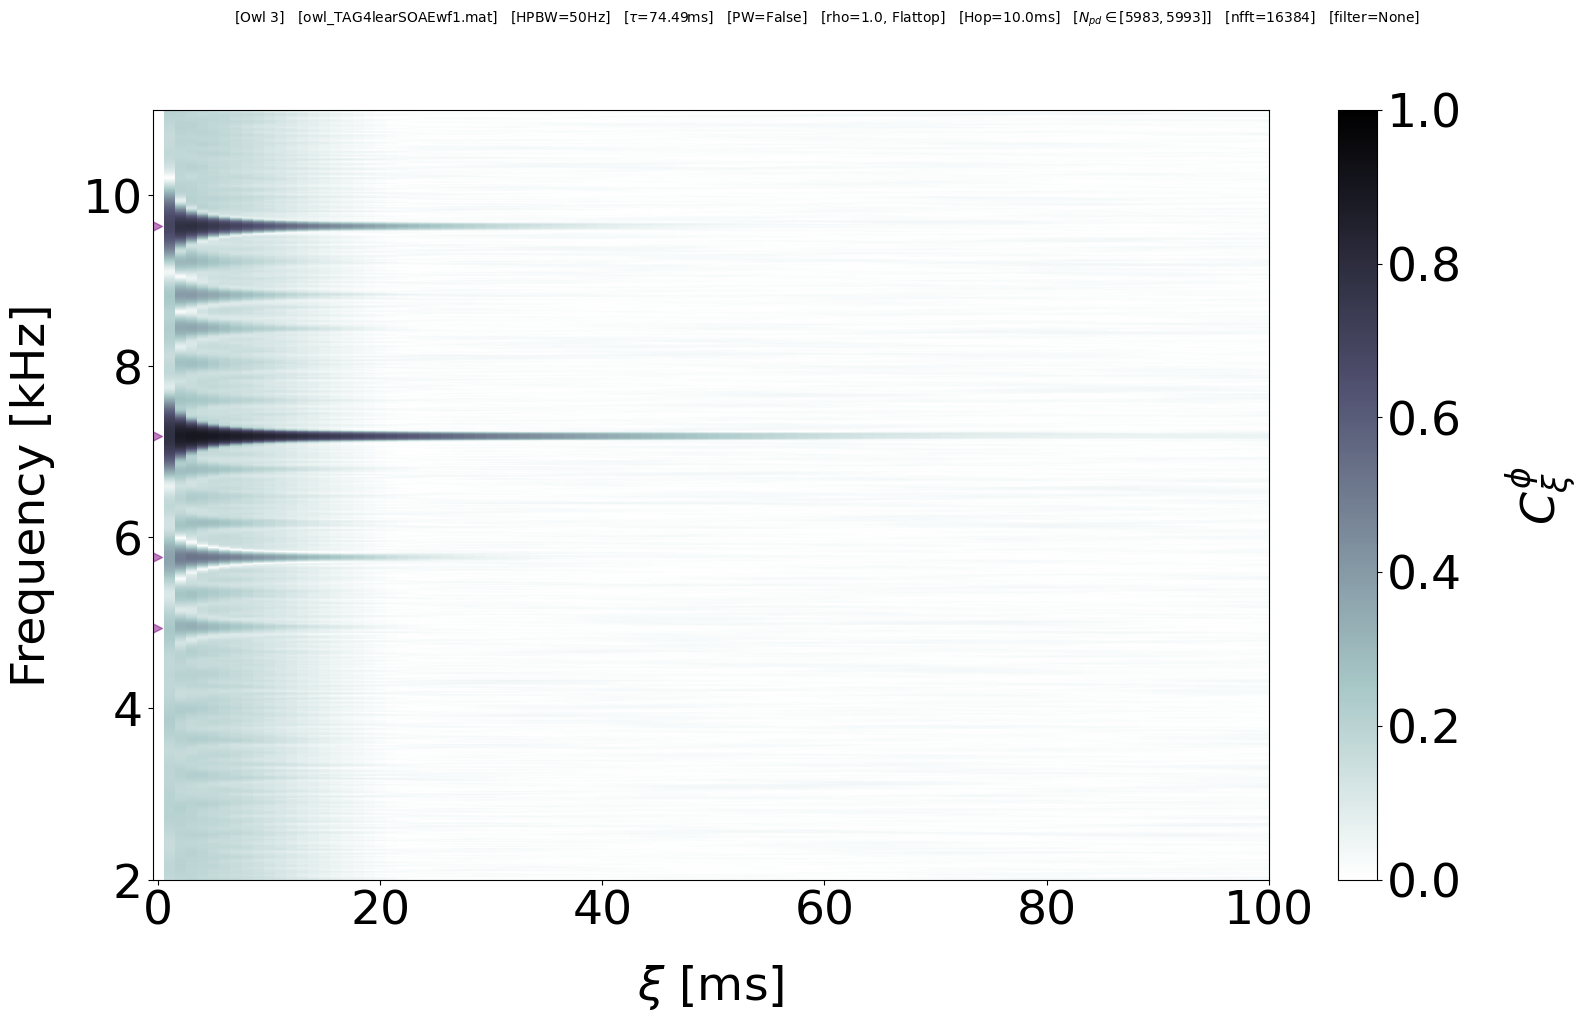

In [37]:
"Owl Colossogram"

# Choose subject
species = "Owl"
wf_idx = 3
# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 0.1
tau = get_precalc_tau_from_bw(bw, fs, win_type, tau_pkl_folder)

# Load Colossogram
cgram_dict = load_calc_colossogram(
    **(
        lcc_kwargs
        | {
            "xi_max_s": xi_max_s,
            "species": species,
            "fs": fs,
            "tau": tau,
            "hop": int(round(hop_s * fs)),
            "wf": wf,
            "wf_idx": wf_idx,
            "wf_fn": wf_fn,
        }
    )
)


# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
fn_id = cgram_dict["fn_id"]
win_meth_str = cgram_dict["win_meth_str"]
method_id = cgram_dict["method_id"]
filter_str = cgram_dict["filter_str"]
N_pd_str = pc.get_N_pd_str(const_N_pd, cgram_dict["N_pd_min"], cgram_dict["N_pd_max"])
f = cgram_dict["f"]
xis_s = cgram_dict["xis_s"]
good_peak_idxs = np.argmin(np.abs(f[:, None] - good_peak_freqs[None, :]), axis=0)
method_id = rf"[$\tau$={(tau/fs)*1000:.2f}ms]   [PW={pw}]   [{win_meth_str}]   [Hop={hop_s*1000:.1f}ms]   [{N_pd_str}]   [nfft={nfft}]"
suptitle = (
    rf"[{species} {wf_idx}]   [{wf_fn}]   [HPBW={bw}Hz]   {method_id}   [{filter_str}]"
)

# MAKE PLOT
plt.figure(figsize=(18, 10))
cbar = pc.plot_colossogram(
    cgram_dict,
    cmap="bone_r",
    return_cbar=True
)
# Set Chris' requested fontsizes
ax = plt.gca()


ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel("Frequency [kHz]", labelpad=labelpad, fontsize=fontsize)

ax.tick_params('both', labelsize=fontsize)
cbar.ax.yaxis.label.set_fontsize(fontsize)
cbar.ax.tick_params(labelsize=fontsize)

plt.ylim(2, 11)
xmin=-0.5
plt.xlim(xmin, 100)

for f0_idx in good_peak_idxs:
    plt.scatter(
        xmin/2,
        f[f0_idx] / 1000,
        c="purple",
        marker=">",
        label="Peak at " + f"{f[f0_idx]:0f}Hz",
        alpha=0.5,
        s=100
    )
    
# plt.title(f"Colossogram", fontsize=18)
plt.suptitle(suptitle, fontsize=10)
# plt.tight_layout()
plt.savefig(os.path.join(paper_figures_folder, f'Owl Colossogram ({wf_fn.split('.')[0]}).jpg'),dpi=500)

Processing 'pickles\soae\Anole 0, PW=False, rho=1.0, Flattop, hop=441, tau=3285, filter=None, xi_max=100ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=AC6rearSOAEwfB1 (Colossogram).pkl'


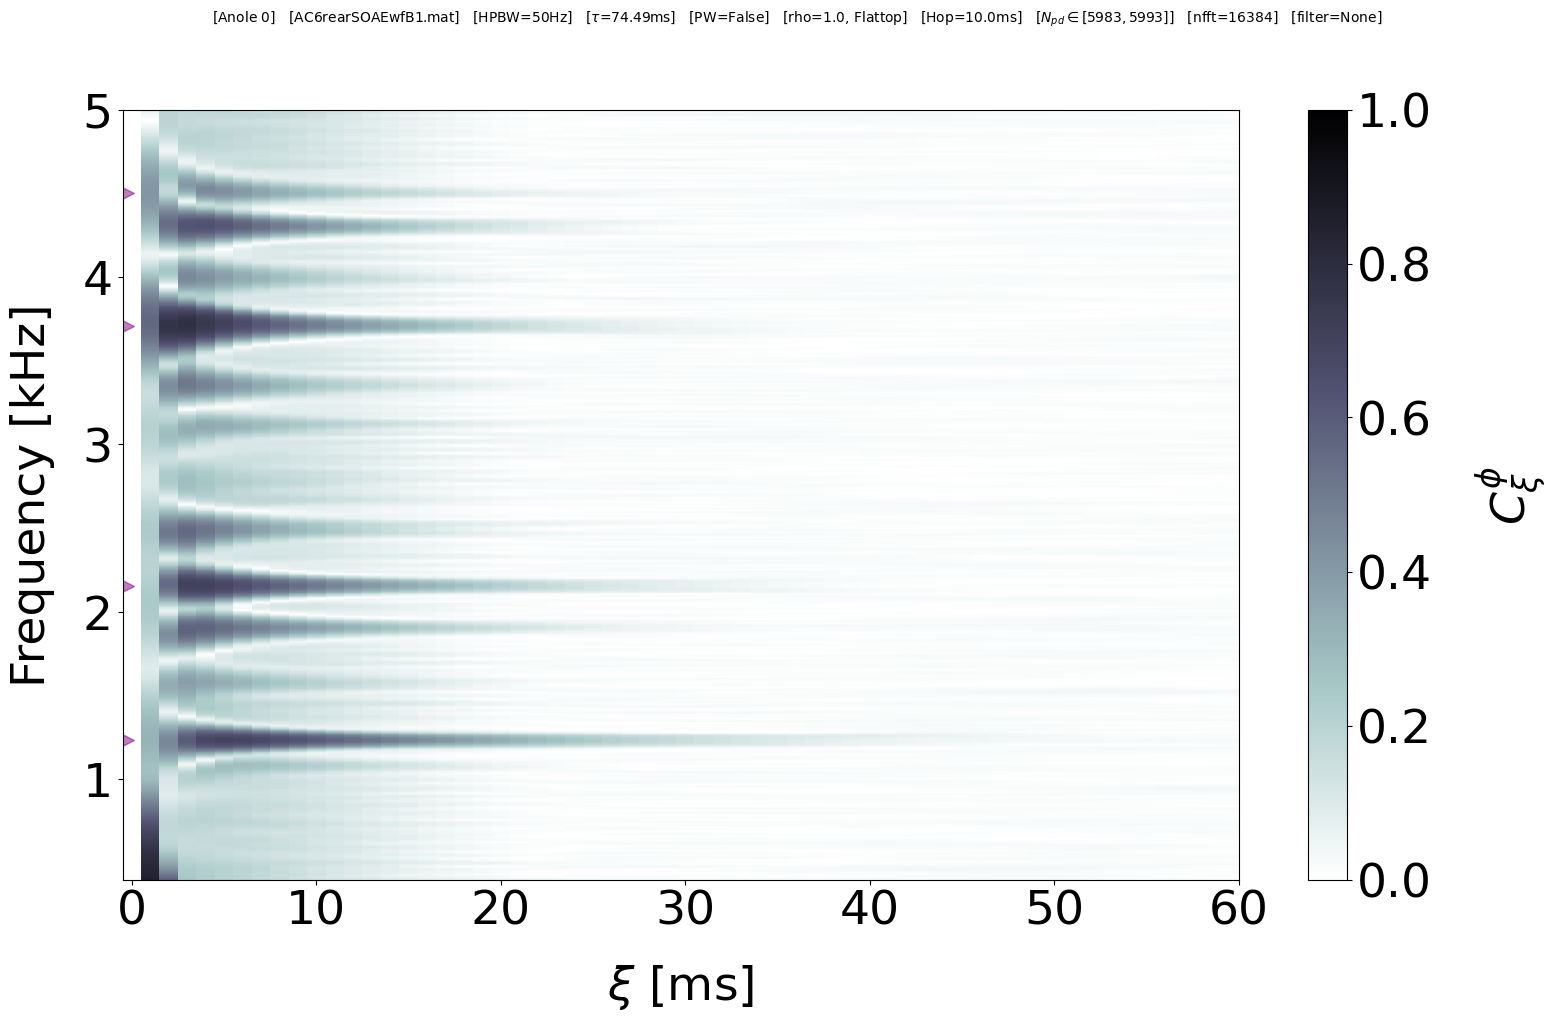

In [38]:
"Anole Colossogram"

# Choose subject
species = "Anole"
wf_idx = 0

# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 0.1
tau = get_precalc_tau_from_bw(bw, fs, win_type, tau_pkl_folder)

# Load Colossogram
cgram_dict = load_calc_colossogram(
    **(
        lcc_kwargs
        | {
            "xi_max_s": xi_max_s,
            "species": species,
            "fs": fs,
            "tau": tau,
            "hop": int(round(hop_s * fs)),
            "wf": wf,
            "wf_idx": wf_idx,
            "wf_fn": wf_fn,
        }
    )
)


# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
fn_id = cgram_dict["fn_id"]
win_meth_str = cgram_dict["win_meth_str"]
method_id = cgram_dict["method_id"]
filter_str = cgram_dict["filter_str"]
N_pd_str = pc.get_N_pd_str(const_N_pd, cgram_dict["N_pd_min"], cgram_dict["N_pd_max"])
f = cgram_dict["f"]
xis_s = cgram_dict["xis_s"]
good_peak_idxs = np.argmin(np.abs(f[:, None] - good_peak_freqs[None, :]), axis=0)
method_id = rf"[$\tau$={(tau/fs)*1000:.2f}ms]   [PW={pw}]   [{win_meth_str}]   [Hop={hop_s*1000:.1f}ms]   [{N_pd_str}]   [nfft={nfft}]"
suptitle = (
    rf"[{species} {wf_idx}]   [{wf_fn}]   [HPBW={bw}Hz]   {method_id}   [{filter_str}]"
)

# MAKE PLOT
plt.figure(figsize=(18, 10))
cbar = pc.plot_colossogram(
    cgram_dict,
    cmap="bone_r",
    return_cbar=True
)
# Set Chris' requested fontsizes
ax = plt.gca()


ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel("Frequency [kHz]", labelpad=labelpad, fontsize=fontsize)

ax.tick_params('both', labelsize=fontsize)
cbar.ax.yaxis.label.set_fontsize(fontsize)
cbar.ax.tick_params(labelsize=fontsize)

plt.ylim(0.4, 5)
xmin=-0.5
plt.xlim(xmin, 60)

for f0_idx in good_peak_idxs:
    plt.scatter(
        xmin/2,
        f[f0_idx] / 1000,
        c="purple",
        marker=">",
        label="Peak at " + f"{f[f0_idx]:0f}Hz",
        alpha=0.5,
        s=100
    )
    
# plt.title(f"Colossogram", fontsize=18)
plt.suptitle(suptitle, fontsize=10)
# plt.tight_layout()
plt.savefig(os.path.join(paper_figures_folder, f'Anole Colossogram ({wf_fn.split('.')[0]}).jpg'),dpi=500)

Processing 'pickles\soae\Anole 0, PW=False, rho=1.0, Flattop, hop=441, tau=3285, filter=None, xi_max=100ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=AC6rearSOAEwfB1 (Colossogram).pkl'
Initializing fit on 4500Hz autocoherence decay...
One peak found in first 26ms of xi, starting fit here
Fitting...
Fit succeeded on first try!


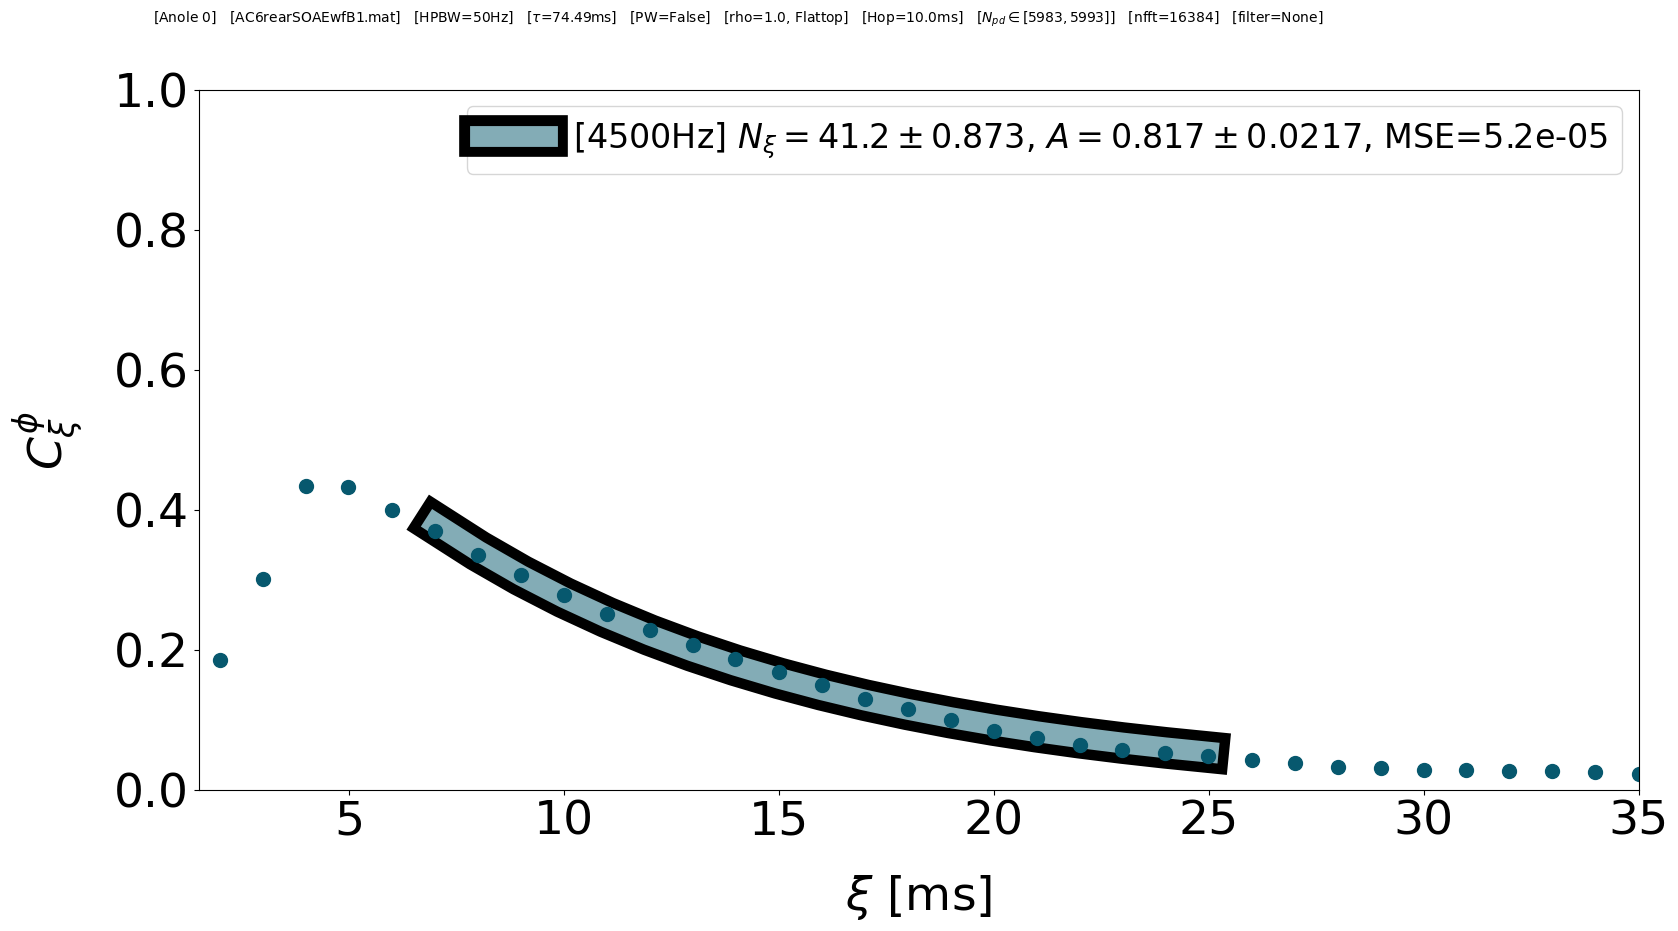

In [39]:
"Anole N_xi Fit"

# Choose subject
species = "Anole"
wf_idx = 0


# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 0.1
tau = get_precalc_tau_from_bw(bw, fs, win_type, tau_pkl_folder)

# Load Colossogram
cgram_dict = load_calc_colossogram(
    **(
        lcc_kwargs
        | {
            "xi_max_s": xi_max_s,
            "species": species,
            "fs": fs,
            "tau": tau,
            "hop": int(round(hop_s * fs)),
            "wf": wf,
            "wf_idx": wf_idx,
            "wf_fn": wf_fn,
        }
    )
)


# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
fn_id = cgram_dict["fn_id"]
win_meth_str = cgram_dict["win_meth_str"]
method_id = cgram_dict["method_id"]
filter_str = cgram_dict["filter_str"]
N_pd_str = pc.get_N_pd_str(const_N_pd, cgram_dict["N_pd_min"], cgram_dict["N_pd_max"])
f = cgram_dict["f"]
xis_s = cgram_dict["xis_s"]
good_peak_idxs = np.argmin(np.abs(f[:, None] - good_peak_freqs[None, :]), axis=0)
method_id = rf"[$\tau$={(tau/fs)*1000:.2f}ms]   [PW={pw}]   [{win_meth_str}]   [Hop={hop_s*1000:.1f}ms]   [{N_pd_str}]   [nfft={nfft}]"
suptitle = (
    rf"[{species} {wf_idx}]   [{wf_fn}]   [HPBW={bw}Hz]   {method_id}   [{filter_str}]"
)

# Get N_xi_fit
f0 = 4500

# Fitting Parameters
A_max = np.inf  # 1 or np.inf
A_const = False  # Fixes the amplitude of the decay at 1

N_xi, N_xi_dict = pc.get_N_xi(
    cgram_dict,
    f0,
)

# MAKE PLOT
fig = plt.figure(figsize=(18, 10))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.7])  # [left, bottom, width, height] in figure fraction
pc.plot_N_xi_fit(N_xi_dict, color=anole_color, plot_noise_floor=False, lw_fit=15, lw_stroke=15, s_signal=100)


ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel(r"$C_\xi^\phi$", labelpad=labelpad, fontsize=fontsize)
ax.set_title("")
ax.legend(fontsize=fontsize-10)

ax.tick_params('both', labelsize=fontsize)

plt.xlim(1.5, 35)
    
# plt.title(f"Colossogram", fontsize=18)
plt.suptitle(suptitle, fontsize=10)
# plt.tight_layout()
plt.savefig(os.path.join(paper_figures_folder, f'Anole N_xi Fit [{f0:.0f}Hz] ({wf_fn.split('.')[0]}).jpg'), dpi=500)

Processing 'pickles\soae\Human 3, PW=False, rho=1.0, Flattop, hop=441, tau=3285, filter=None, xi_max=1500ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=TH13RearwaveformSOAE (Colossogram).pkl'
Initializing fit on 904Hz autocoherence decay...
One peak found in first 376ms of xi, starting fit here
Fitting...
Fit succeeded on first try!


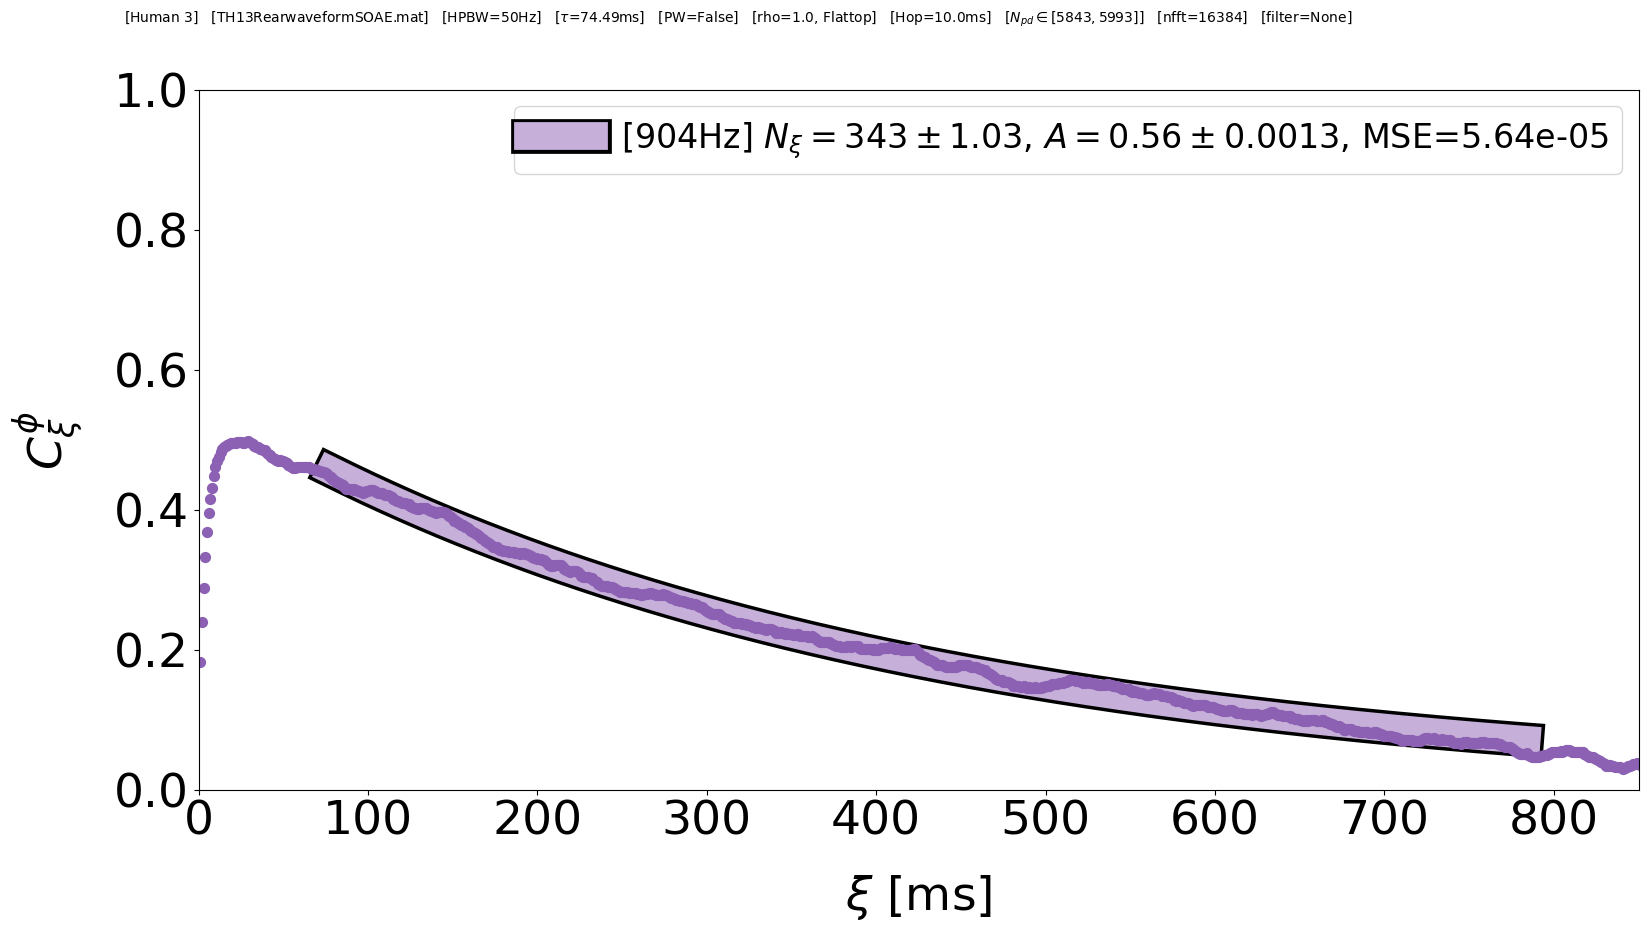

In [40]:
"Human N_xi Fit"

# Choose subject
species = "Human"
wf_idx = 3
# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 1.5
tau = get_precalc_tau_from_bw(bw, fs, win_type, tau_pkl_folder)

# Load Colossogram
cgram_dict = load_calc_colossogram(
    **(
        lcc_kwargs
        | {
            "xi_max_s": xi_max_s,
            "species": species,
            "fs": fs,
            "tau": tau,
            "hop": int(round(hop_s * fs)),
            "wf": wf,
            "wf_idx": wf_idx,
            "wf_fn": wf_fn,
        }
    )
)


# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
fn_id = cgram_dict["fn_id"]
win_meth_str = cgram_dict["win_meth_str"]
method_id = cgram_dict["method_id"]
filter_str = cgram_dict["filter_str"]
N_pd_str = pc.get_N_pd_str(const_N_pd, cgram_dict["N_pd_min"], cgram_dict["N_pd_max"])
f = cgram_dict["f"]
xis_s = cgram_dict["xis_s"]
good_peak_idxs = np.argmin(np.abs(f[:, None] - good_peak_freqs[None, :]), axis=0)
method_id = rf"[$\tau$={(tau/fs)*1000:.2f}ms]   [PW={pw}]   [{win_meth_str}]   [Hop={hop_s*1000:.1f}ms]   [{N_pd_str}]   [nfft={nfft}]"
suptitle = (
    rf"[{species} {wf_idx}]   [{wf_fn}]   [HPBW={bw}Hz]   {method_id}   [{filter_str}]"
)

# Get N_xi_fit
f0 = 904

# Fitting Parameters
A_max = np.inf  # 1 or np.inf
A_const = False  # Fixes the amplitude of the decay at 1

N_xi, N_xi_dict = pc.get_N_xi(
    cgram_dict,
    f0,
    A_max=A_max,
    A_const=A_const,
)



# MAKE PLOT
fig = plt.figure(figsize=(18, 10))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.7])  # [left, bottom, width, height] in figure fraction
pc.plot_N_xi_fit(N_xi_dict, color=human_color, plot_noise_floor=False, s_signal=50, lw_fit=20, lw_stroke=5)


ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel(r"$C_\xi^\phi$", labelpad=labelpad, fontsize=fontsize)
ax.set_title("")
ax.legend(fontsize=fontsize-10)

ax.tick_params('both', labelsize=fontsize)

plt.xlim(0, 850)
    
# plt.title(f"Colossogram", fontsize=18)
plt.suptitle(suptitle, fontsize=10)
# plt.tight_layout()
plt.savefig(os.path.join(paper_figures_folder, f'{species} N_xi Fit ({wf_fn.split('.')[0]}).jpg'),dpi=500)

Processing 'pickles\soae\Tokay 2, PW=False, rho=1.0, Flattop, hop=441, tau=3285, filter=None, xi_max=100ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=tokay_GG3rearSOAEwf (Colossogram).pkl'
Processing 'pickles\soae\Tokay 2, PW=False, Static Flattop, hop=441, tau=3285, filter=None, xi_max=50ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=tokay_GG3rearSOAEwf (Colossogram).pkl'
Processing 'pickles\soae\Tokay 2, PW=False, Static Flattop, hop=441, tau=1095, filter=None, xi_max=100ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=tokay_GG3rearSOAEwf (Colossogram).pkl'


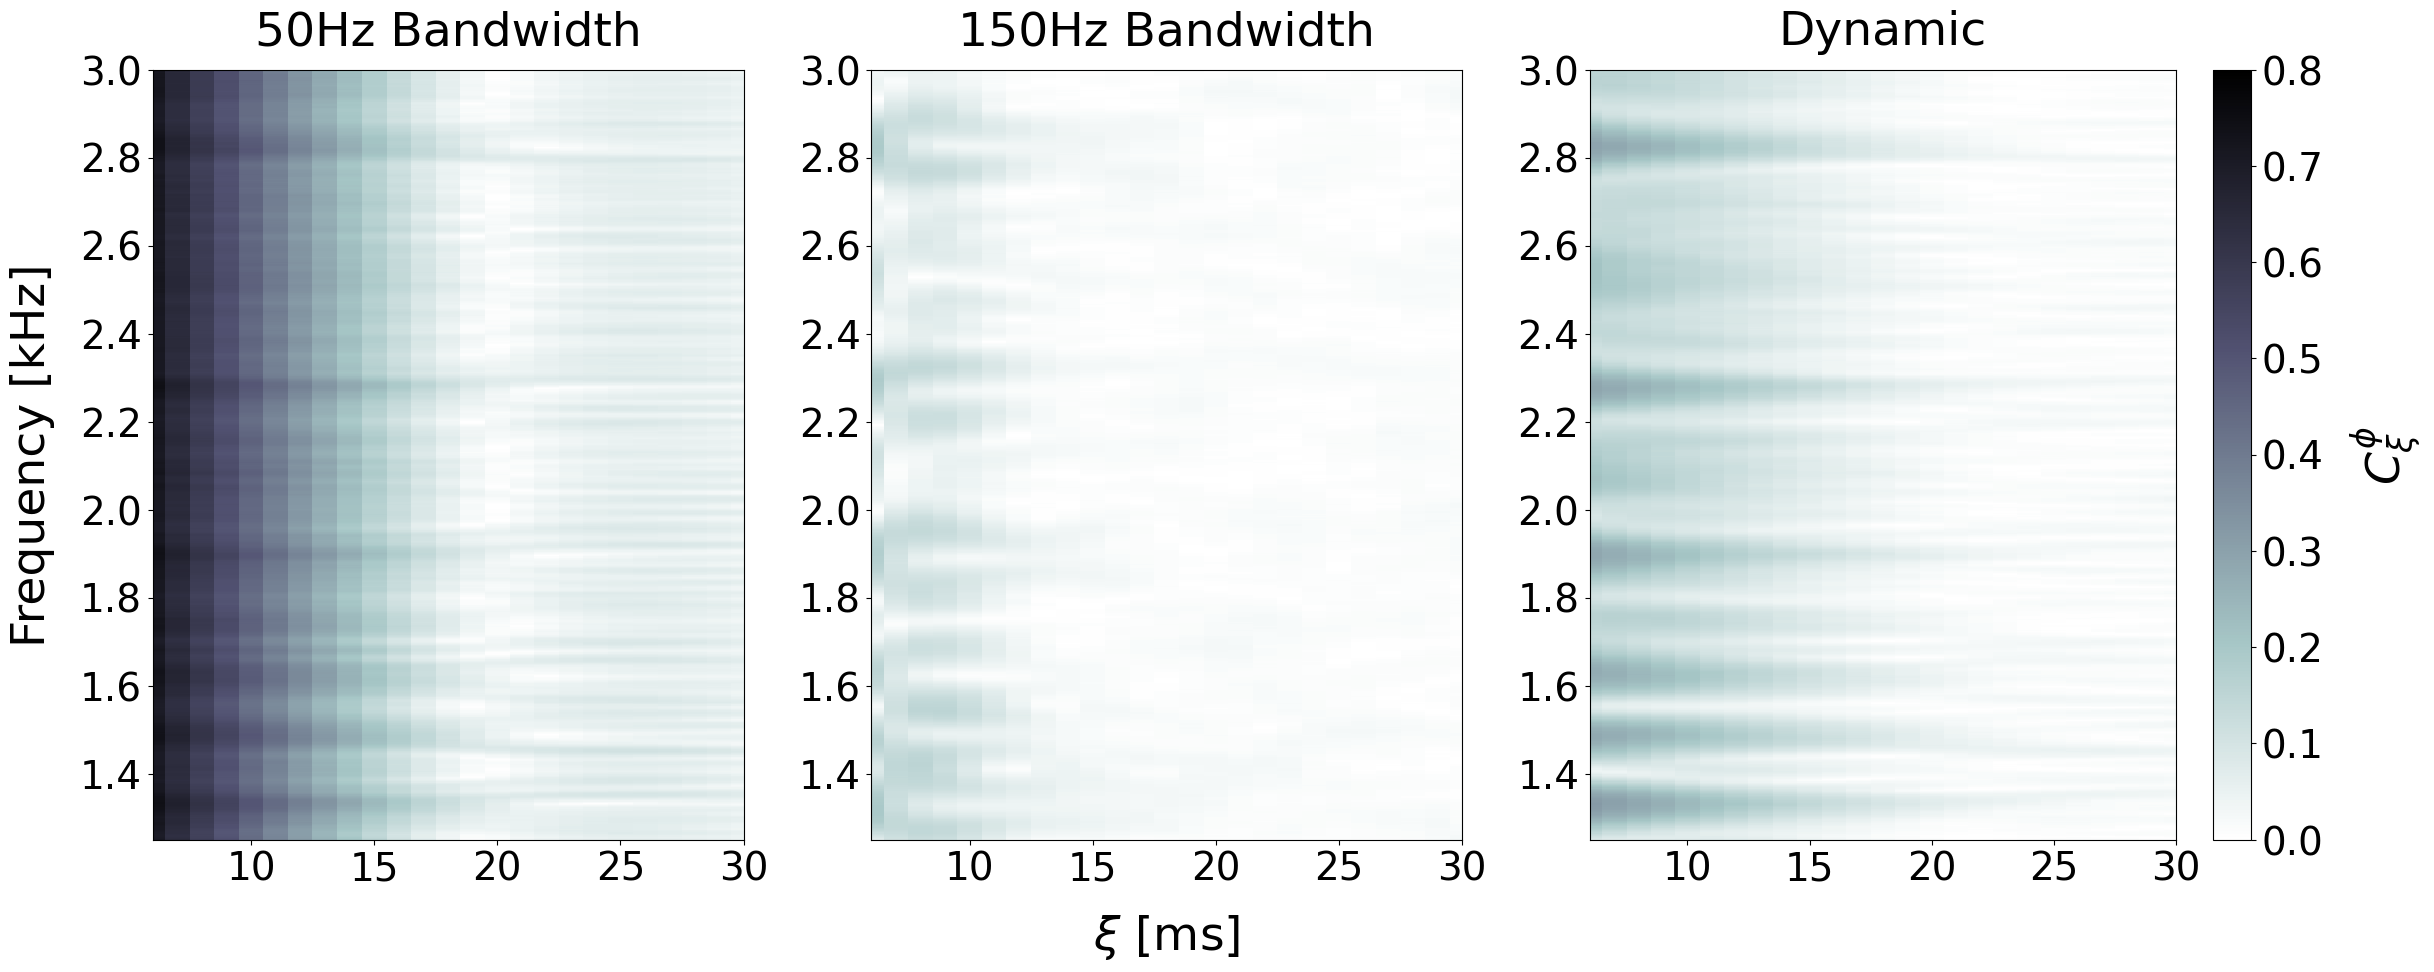

In [41]:
"Static vs Dynamic Colossogram"
# Choose subject
species = "Tokay"
wf_idx = 2

# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Plot params
xlabel = r"$\xi$ [ms]"
ylabel = "Frequency [kHz]"
cmap = "bone_r"
cbar_label = r"$C_\xi^\phi$"
fontsize_plot = 34
fontsize_ticks = 28
labelpad = 18
labelpad_ticks = 4
ymax = 3.0
ymin = 1.25
xmin = 6
xmax = 30
vmax_1 = 0.8
vmax_2 = 0.8

# Get/set coherence params
filter_meth=None
wf_len_s = 60  # Will crop waveform to this length (in seconds)
scale = True  # Scale the waveform (only actually scales if we know the right scaling constant, which is only Anoles and Humans)
hop_s = 0.01
win_type = "flattop"
rho = 1.0
win_meth = {"method": "rho", "rho": rho, "win_type": win_type}
pw = False
bw = 50
xi_min_s = 0.001
xi_max_s = 0.1
nfft = 2**14
const_N_pd = 0
show_plots = 1


tau = get_precalc_tau_from_bw(bw, fs, win_type, tau_pkl_folder)

# Start building LCC kwargs dict with constants
lcc_kwargs_alt = {
    "wf_len_s": wf_len_s,
    "filter_meth": filter_meth,
    "pw": pw,
    "xi_min_s": xi_min_s,
    "win_meth": win_meth,
    "nfft": nfft,
    "pkl_folder": pkl_folder,
    "xi_max_s": xi_max_s,
    "species": species,
    "fs": fs,
    "tau": tau,
    "hop": int(round(hop_s * fs)),
    "wf": wf,
    "wf_idx": wf_idx,
    "wf_fn": wf_fn,
}


# INITIALIZE PLOT
fig, axes = plt.subplots(1, 3, figsize=(28, 10), gridspec_kw={'width_ratios': [1, 1, 1.24]})
# plt.subplots_adjust(wspace=0, hspace=0)


# Load Colossogram
cgram_dict = load_calc_colossogram(**lcc_kwargs_alt)

# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
xis_s = cgram_dict["xis_s"]
f = cgram_dict["f"]

# MAKE PLOT
plt.sca(axes[2])
cbar = pc.plot_colossogram(cgram_dict, cmap=cmap, return_cbar=True, vmax=vmax_2)
plt.title("Dynamic", pad=labelpad, fontsize=fontsize_plot)
# Set Chris' requested fontsizes
ax = plt.gca()

ax.set_ylabel(None)
ax.set_xlabel(None)

ax.tick_params("both", labelsize=fontsize_ticks, pad=labelpad_ticks)
cbar.ax.set_ylabel(cbar_label, labelpad=labelpad)
cbar.ax.yaxis.label.set_fontsize(fontsize_plot)
cbar.ax.tick_params(labelsize=fontsize_ticks, pad=labelpad_ticks)



plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)

"Repeat for static (50Hz)"
# Switch to static
lcc_kwargs_alt["win_meth"] = {"method": "static", "win_type": win_type}
lcc_kwargs_alt['xi_max_s'] = 0.05

# Change bandwidth
bw_static = 50
tau_static_50 = get_precalc_tau_from_bw(bw_static, fs, win_type, tau_pkl_folder)
lcc_kwargs_alt["tau"] = tau_static_50

# Load Colossogram
cgram_dict = load_calc_colossogram(**(lcc_kwargs_alt))

# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
xis_s = cgram_dict["xis_s"]
f = cgram_dict["f"]

# MAKE PLOT
plt.sca(axes[0])
plt.title("50Hz Bandwidth", pad=labelpad, fontsize=fontsize_plot)
cbar = pc.plot_colossogram(cgram_dict, cmap=cmap, return_cbar=True, vmax=vmax_1)
# Set Chris' requested fontsizes
ax = plt.gca()


# ax.set_xlabel(xlabel, labelpad=labelpad_tight, fontsize=fontsize_tight)
ax.set_ylabel(ylabel, labelpad=labelpad, fontsize=fontsize_plot)
ax.set_xlabel(None)

ax.tick_params("both", labelsize=fontsize_ticks, pad=labelpad_ticks)

cbar.ax.set_ylabel(None)
cbar.ax.tick_params(labelsize=fontsize_ticks, pad=labelpad_ticks)
if vmax_1 == vmax_2:
    cbar.remove()

plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)


"Repeat for static (150Hz)"
bw_static = 150
tau_static_150 = get_precalc_tau_from_bw(bw_static, fs, win_type, tau_pkl_folder)
lcc_kwargs_alt['tau'] = tau_static_150
lcc_kwargs_alt['xi_max_s'] = 0.1

# Load Colossogram
cgram_dict = load_calc_colossogram(**(lcc_kwargs_alt))

# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
xis_s = cgram_dict["xis_s"]
f = cgram_dict["f"]


# MAKE PLOT
plt.sca(axes[1])
plt.title("150Hz Bandwidth", pad=labelpad, fontsize=fontsize_plot)
cbar = pc.plot_colossogram(cgram_dict, cmap=cmap, return_cbar=True, vmax=vmax_2)
# Set Chris' requested fontsizes
ax = plt.gca()



ax.set_xlabel(xlabel, labelpad=labelpad, fontsize=fontsize_plot)
ax.set_ylabel(None)

ax.tick_params("both", labelsize=fontsize_ticks, pad=labelpad_ticks)
cbar.ax.set_ylabel(None)
cbar.ax.tick_params(labelsize=fontsize_ticks, pad=labelpad_ticks)
if vmax_1 == vmax_2:
    cbar.remove()

plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)

# plt.tight_layout()

plt.savefig(os.path.join(paper_figures_folder, f'dyn win cgram fig.jpg'),dpi=500)

BW=50Hz
Processing 'pickles\soae\Anole 0, PW=False, Static Flattop, hop=441, tau=3285, filter=None, xi_max=50ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=AC6rearSOAEwfB1 (Colossogram).pkl'
Initializing fit on 4500Hz autocoherence decay...
No peaks found in first 20ms of xi, starting fit at first xi!
Fitting...
Fit succeeded on first try!
BW=50Hz
Processing 'pickles\soae\Human 2, PW=False, Static Flattop, hop=441, tau=3285, filter=None, xi_max=200ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=LSrearSOAEwf1 (Colossogram).pkl'
Initializing fit on 1637Hz autocoherence decay...
No peaks found in first 50ms of xi, starting fit at first xi!
Fitting...
Fit succeeded on first try!
BW=150Hz
Processing 'pickles\soae\Anole 0, PW=False, Static Flattop, hop=441, tau=1095, filter=None, xi_max=50ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=AC6rearSOAEwfB1 (Colossogram).pkl'
Initializing fit on 4500Hz autocoherence decay...
No peaks found in first 20ms of xi, starting fit at first xi!
Fitt

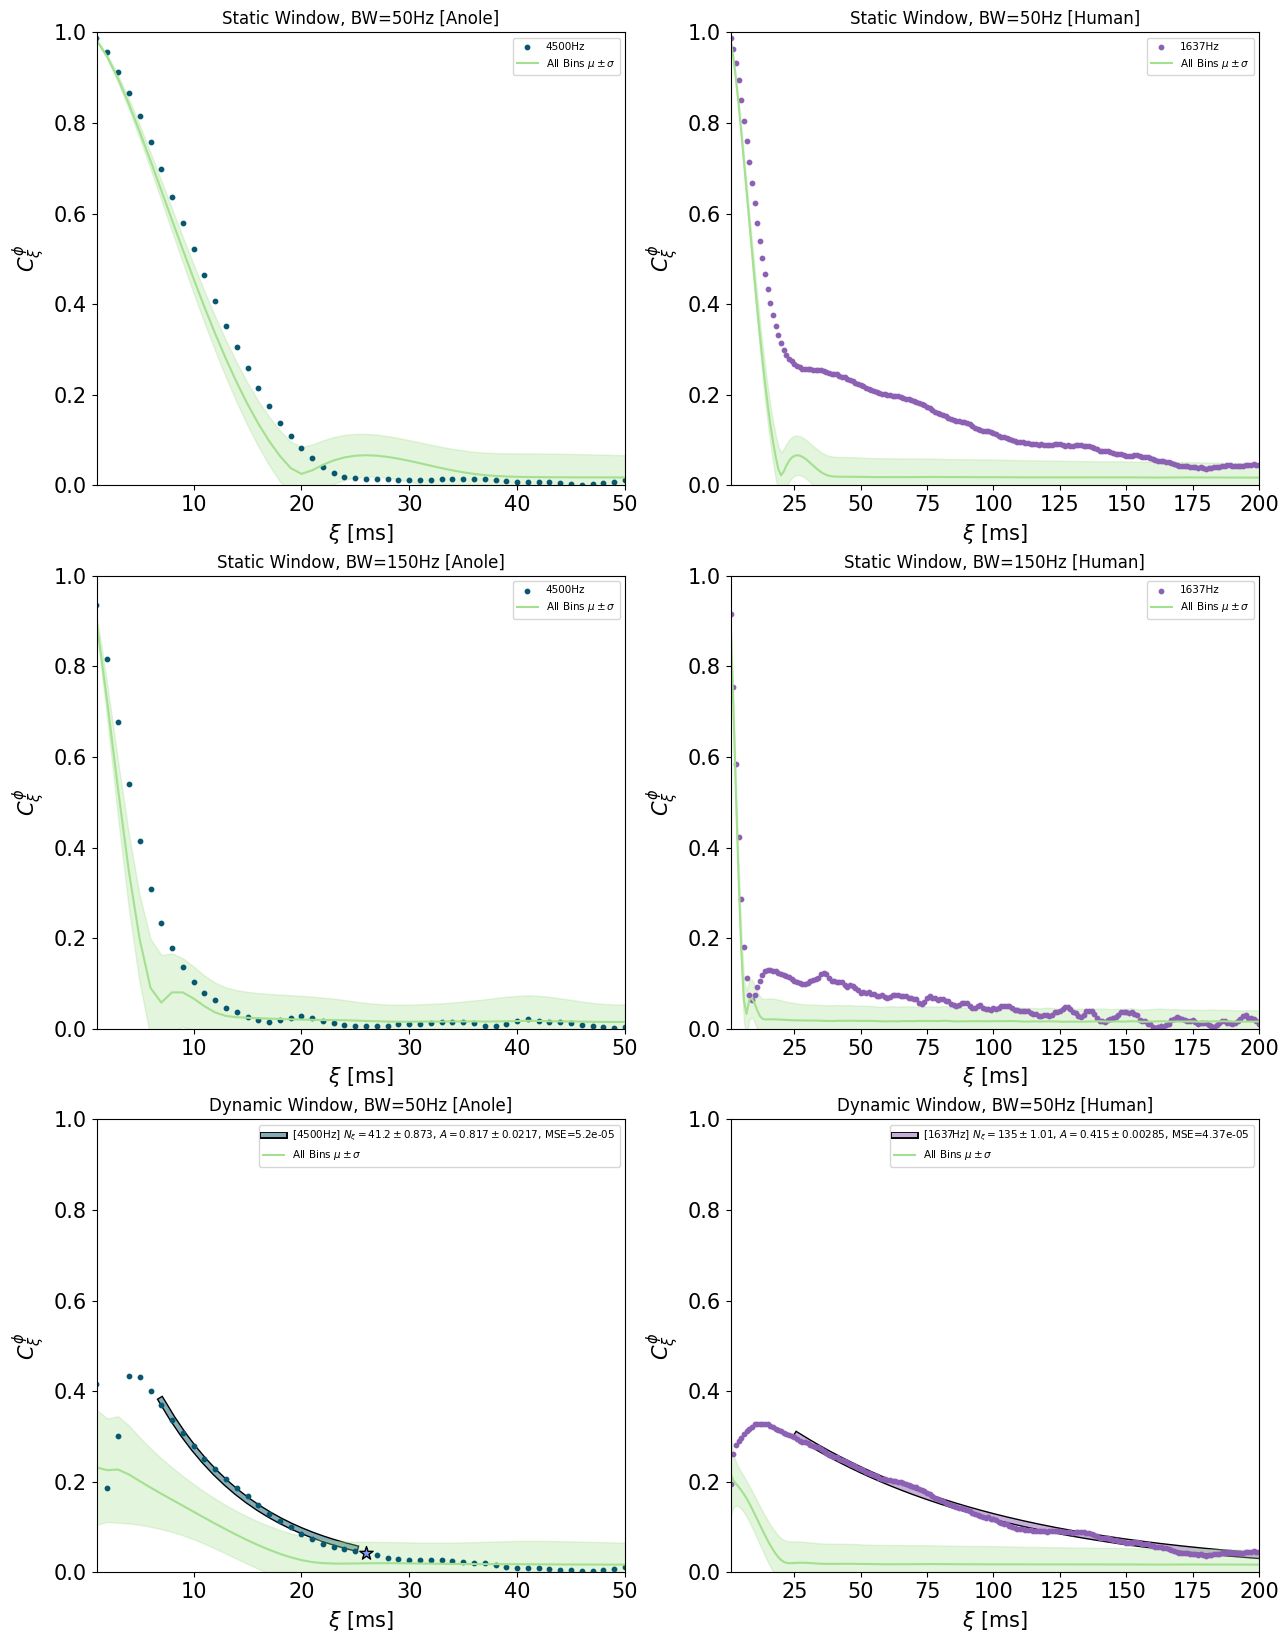

In [42]:
"Ruling Out Static Windowing Plot"

# WF pre-processing parameters
filter_meth = None
wf_len_s = 60  # Will crop waveform to this length (in seconds)
scale = True  # Scale the waveform (only actually scales if we know the right scaling constant, which is only Anoles and Humans)

# Coherence Parameters
hop_s = 0.01
win_type = "flattop"
rho = 1.0
pw = False
demean = True

bws = [50, 150, 51]
xi_min_s = 0.001
delta_xi_s = 0.001
nfft = 2**14
const_N_pd = 0


# Start building LCC kwargs dict with constants
lcc_kwargs = {
    "wf_len_s": wf_len_s,
    "pw": pw,
    "xi_min_s": xi_min_s,
    "nfft": nfft,
    "pkl_folder": pkl_folder,
    "demean":demean,
}

# human_idx = 0
# human_f0 = 2665
# human_idx = 3
# human_f0 = 2697
human_idx = 2
human_f0 = 1637

anole_idx = 0
anole_f0 = 4500

plt.figure(figsize=(15, 20))
fontsize2= 15
labelpad2 = 5
row_idx = 0
for bw in bws:
    if bw == 51:
        win_meth = {"method": "rho", "rho": rho, "win_type": win_type}
        bw = 50
        wm_str = "Dynamic"
        
    else:
        win_meth = {"method": "static", "win_type": win_type}
        wm_str = "Static"
    for species, wf_idx, col_idx, f0 in [
        ("Anole", anole_idx, 1, anole_f0),
        ("Human", human_idx, 2, human_f0),
    ]:
        f0s = None
        # title = f"{wm_str}, BW={bw} [{species} {f0}Hz]" if row_idx ==0 else f"{wm_str}, BW={bw}"
        title = f"{wm_str} Window, BW={bw}Hz [{species}]"
        decay_start_limit_xi_s = 0.05 if species == "Human" else 0.02
        plt.subplot(3, 2, col_idx + row_idx)

        # Get wf info
        wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
            species=species,
            wf_idx=wf_idx,
        )
        hop = int(round(hop_s * fs))
        if wm_str == "Dynamic":
            if species == "Human":
                xi_max_s = 1.5
            else:
                xi_max_s = 0.1
        elif wm_str == "Static":
            if species == "Human":
                xi_max_s = 0.2
            else:
                xi_max_s = 0.05
        # if species == "Human" and wm_str == "Static" and bw == 150:
        #     filter_meth = {
        #         "type": "kaiser",
        #         "cf": 300,
        #         "df": 50,
        #         "rip": 100,
        #     }
        #     xi_max_s = 0.15
        # else:
        #     filter_meth = None
        filter_meth=None
        xmin = 1

        xmax = 50 if species == "Anole" else 200

        # Get cgram
        print(f"BW={bw}Hz")
        tau = get_precalc_tau_from_bw(bw, fs, win_type, tau_pkl_folder)
        cgram_dict = load_calc_colossogram(
            **(
                lcc_kwargs
                | {
                    "xi_max_s": xi_max_s,
                    "species": species,
                    "fs": fs,
                    "tau": tau,
                    "hop": hop,
                    "wf": wf,
                    "wf_idx": wf_idx,
                    "wf_fn": wf_fn,
                    "win_meth": win_meth,
                    "filter_meth": filter_meth,
                    "f0s":f0s
                }
            )
        )
        _, N_xi_dict = pc.get_N_xi(
            cgram_dict, decay_start_limit_xi_s=decay_start_limit_xi_s, f0=f0
        )
        pc.plot_N_xi_fit(N_xi_dict, plot_fit=(wm_str == "Dynamic"), color=human_color if species=='Human' else anole_color)
        plt.xlim(xmin, xmax)
        plt.title(title)
        plt.legend(fontsize=fontsize2/2)
        ax = plt.gca()
        ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad2, fontsize=fontsize2)
        ax.set_ylabel(r"$C_\xi^\phi$", labelpad=labelpad2, fontsize=fontsize2)
        ax.tick_params("both", labelsize=fontsize2)
    row_idx += 2
# plt.tight_layout()
plt.savefig(
    os.path.join(paper_figures_folder, f"Ruling out static windowing.jpg"),
    dpi=500,
)

Excluding Anole 1 3023Hz
Excluding Anole 2 1811Hz
Excluding Anole 3 2140Hz
Excluding Anole 3 2417Hz
Excluding Anole 3 2783Hz
Excluding Owl 0 4351Hz
Excluding Owl 1 9258Hz
Excluding Owl 2 5626Hz
Excluding Owl 3 5768Hz
Excluding Tokay 0 3714Hz
Excluding Tokay 2 1109Hz
Excluding Tokay 2 1620Hz
Excluding Tokay 3 1104Hz
Excluding Human 0 2805Hz
Excluding Human 2 1634Hz


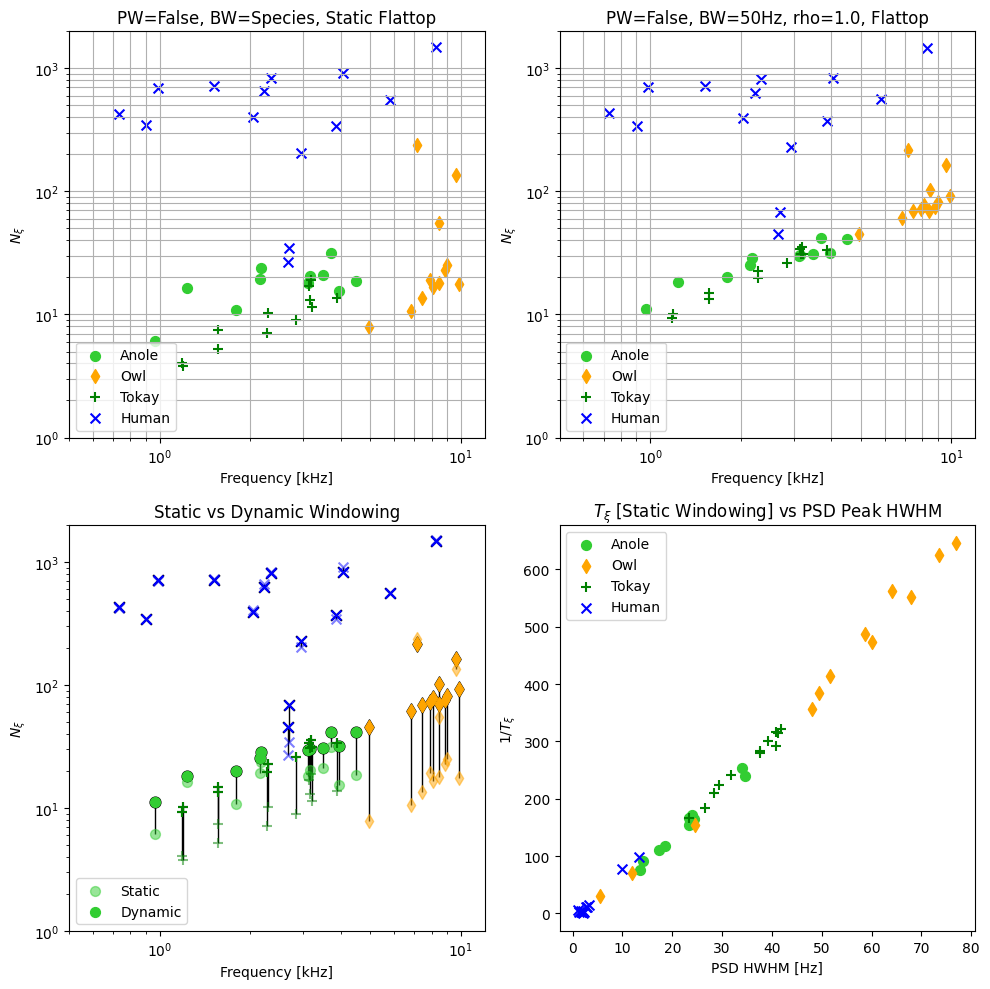

In [43]:
import phaseco as pc
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


"Compareing N_xi vs freq plots between two windowing methods"


# Switches
show_plot = 0
save_fig = 1

# Plotting params
alpha_static = 0.5
# strokecolor_stat = 'black'
strokecolor_dyn = 'black'
s = 50
s_stroke = s*1.2


# Globals
nfft = 2**14
win_type = "flattop"
species_bws = {"Anole": 150, "Human": 50, "Owl": 300, "Tokay": 150}
markers = {
    "Anole": ("limegreen", "o"),
    "Owl": ("orange", "d"),
    "Human": ("blue", "x"),
    "Tokay": ("green", "+"),
}
results_folder = os.path.join("results", "soae")
mse_thresh = 0.001
xmin = 0.5
xmax = 12
ymin = 1
ymax = 2e3

# Define our methods
static_meth = {
    "win_meth": {"method": "static", "win_type": win_type},
    "hop_thing": ("int", 1),
    "bw_type": "species",
    "pw": False,
}

dynamic_meth = {
    "win_meth": {"method": "rho", "win_type": win_type, "rho": 1.0},
    "hop_thing": ("s", 0.01),
    "bw_type": 50,
    "pw": False,
}

# Excluded fits
excluded_fits = [
    (
        "Owl",
        1,
        9258,
    ),
    ("Owl", 0, 4351),
    ("Anole", 3, 2783),
    ("Anole", 2, 1811),
]


# Define helper func to handle legend labels
def get_label_from_firsts(firsts, species):
    if firsts[species]:
        label = f"{species}"
        firsts[species] = 0
    else:
        label = None
    return label, firsts


# First, we gather everything from the two dataframes
N_xis = {}
T_xis = {}
freqs = {}
speciess = {}
titles = {}
mse_statics = {}
hwhms = {}
wf_idxs = {}
for method, key in zip([static_meth, dynamic_meth], ["static", "dynamic"]):
    # Define strings
    bw_str = (
        f"BW=Species" if method["bw_type"] == "species" else f"BW={method['bw_type']}Hz"
    )
    win_meth_str = pc.get_win_meth_str(method["win_meth"])
    relevant_comp_str = rf"PW={method['pw']}, {bw_str}, {win_meth_str}"
    # Define paths
    specific_results_folder = os.path.join(
        results_folder, rf"SOAE Results ({relevant_comp_str})"
    )
    N_xi_fitted_parameters_fp = os.path.join(
        specific_results_folder, rf"SOAE N_xi Fitted Parameters ({relevant_comp_str}).xlsx"
    )
    # Read df
    df = pd.read_excel(N_xi_fitted_parameters_fp)
    # Gather in lists
    wf_idxs[key] = df["WF Index"]
    N_xis[key] = df["N_xi"]
    T_xis[key] = df["T_xi"]
    freqs[key] = df["Frequency"]
    speciess[key] = df["Species"]
    titles[key] = f"PW={method['pw']}, {bw_str}, {win_meth_str}"
    if method["win_meth"]["method"] == "static":
        hwhms[key] = df["L_gamma"]
        mse_statics[key] = df["MSE"]

# Now we plot!
plt.close("all")
plt.figure(figsize=(10, 10))

"1: Plot static method"
plt.subplot(2, 2, 1)
plt.title(titles["static"])
firsts = {"Anole": 1, "Owl": 1, "Human": 1, "Tokay": 1}
for k in range(len(N_xis["static"])):
    (
        species,
        N_xi,
        freq,
        mse_static,
        wf_idx,
    ) = (
        speciess["static"][k],
        N_xis["static"][k],
        freqs["static"][k],
        mse_statics["static"][k],
        wf_idxs["static"][k],
    )
    if mse_static > mse_thresh or (species, wf_idx, int(round(freq))) in excluded_fits:
        continue
    label, firsts = get_label_from_firsts(firsts, species)
    plt.scatter(
        freq / 1000,
        N_xi,
        label=label,
        color=markers[species][0],
        marker=markers[species][1],
        s=s,
    )
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.loglog()
    plt.legend()
    plt.grid(which="both")
    plt.xlabel("Frequency [kHz]")
    plt.ylabel(r"$N_\xi$")

"2: Plot dynamic method"
plt.subplot(2, 2, 2)
plt.title(titles["dynamic"])
firsts = {"Anole": 1, "Owl": 1, "Human": 1, "Tokay": 1}
for k in range(len(N_xis["static"])):
    species, N_xi, freq, mse_static, wf_idx = (
        speciess["dynamic"][k],
        N_xis["dynamic"][k],
        freqs["dynamic"][k],
        mse_statics["static"][k],
        wf_idxs["dynamic"][k],
    )
    if mse_static > mse_thresh or (species, wf_idx, int(round(freq))) in excluded_fits:
        continue
    label, firsts = get_label_from_firsts(firsts, species)
    plt.scatter(
        freq / 1000,
        N_xi,
        label=label,
        color=markers[species][0],
        marker=markers[species][1],
        s=s,
    )
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.loglog()
    plt.legend()
    plt.grid(which="both")
    plt.xlabel("Frequency [kHz]")
    plt.ylabel(r"$N_\xi$")
plt.tight_layout()

"3: Plot the deltas"
plt.subplot(2, 2, 3)
plt.title(f"Static vs Dynamic Windowing")
# firsts = {"Anole": 1, "Owl": 0, "Human": 0, "Tokay": 0}
for k in range(len(N_xis["static"])):
    species, freq, mse_static, wf_idx = (
        speciess["static"][k],
        freqs["static"][k],
        mse_statics["static"][k],
        wf_idxs["static"][k],
    )
    # Skip egregious static fits
    if mse_static > mse_thresh or (species, wf_idx, int(round(freq))) in excluded_fits:

        continue

    # Get N_xis
    N_xi_dyn = N_xis["dynamic"][k]
    N_xi_stat = N_xis["static"][k]

    # label, firsts = get_label_from_firsts(firsts, species)
    if species == 'Anole' and k==0:
        label_stat = 'Static'
        label_dyn = 'Dynamic'
    else:
        label_stat = None
        label_dyn = None

    # Plot line between them
    plt.vlines(
        freq / 1000,
        ymin=min(N_xi_stat, N_xi_dyn),
        ymax=max(N_xi_stat, N_xi_dyn),
        lw=1,
        color="k",
        zorder=0,
    )

    # Plot each method

    # Static
    plt.scatter(
        freq / 1000,
        N_xi_stat,
        alpha=alpha_static,
        color=markers[species][0],
        marker=markers[species][1],
        zorder=2,
        s=s,
        label=label_stat,
    )
    # plt.scatter(
    #     freq / 1000,
    #     N_xi_stat,
    #     alpha=0.5,
    #     color=strokecolor_stat,
    #     marker=markers[species][1],
    #     zorder=1,
    #     s=s_stroke,
    # )

    # Dynamic
    plt.scatter(
        freq / 1000,
        N_xi_dyn,
        label=label_dyn,
        color=markers[species][0],
        marker=markers[species][1],
        zorder=2,
        s=s,
    )
    plt.scatter(
        freq / 1000,
        N_xi_dyn,
        color=strokecolor_dyn,
        marker=markers[species][1],
        zorder=1,
        s=s_stroke
    )
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.loglog()
    plt.legend(loc='lower left')
    # plt.grid(which="both")
    plt.xlabel("Frequency [kHz]")
    plt.ylabel(r"$N_\xi$")


"4: Plot HWHM vs T_xi (static)"
plt.subplot(2, 2, 4)
plt.title(rf"$T_\xi$ [Static Windowing] vs PSD Peak HWHM")
firsts = {"Anole": 1, "Owl": 1, "Human": 1, "Tokay": 1}
hwhms_for_fit = []
inv_T_xis_for_fit = []
for k in range(len(N_xis["static"])):
    wf_idx, species, freq, mse_static, T_xi, hwhm = (
        wf_idxs["static"][k],
        speciess["static"][k],
        freqs["static"][k],
        mse_statics["static"][k],
        T_xis["static"][k],
        hwhms["static"][k],
    )
    # Skip egregious static fits
    if mse_static > mse_thresh or (species, wf_idx, int(round(freq))) in excluded_fits:
        print(f"Excluding {species} {wf_idx} {freq:.0f}Hz")
        continue
    # Plot
    label, firsts = get_label_from_firsts(firsts, species)
    plt.scatter(
        hwhm,
        1 / T_xi,
        color=markers[species][0],
        marker=markers[species][1],
        zorder=1,
        label=label,
        s=s,
    )
    plt.legend()
    plt.xlabel(r"PSD HWHM [Hz]")
    plt.ylabel(r"$1/T_\xi$")
    # Add for later
    hwhms_for_fit.append(hwhm)
    inv_T_xis_for_fit.append(1 / T_xi)
p = np.polyfit(hwhms_for_fit, inv_T_xis_for_fit, 1)  # p[0] = slope, p[1] = intercept
x = np.linspace(0, max(hwhms_for_fit), 10)
# plt.plot(x, p[0]*x+p[1], label=f'y={p[0]:.3g}x + {p[1]:.3g}')
plt.legend()
plt.tight_layout()


if save_fig:
    paper_figs_folder = os.path.join("results", "paper_figures")
    os.makedirs(paper_figs_folder, exist_ok=True)
    fig_fp = os.path.join(paper_figs_folder, rf"static vs dynamic windowing.jpg")
    plt.savefig(fig_fp, dpi=500)

if show_plot:
    plt.show()
